In [1]:
from IPython.display import display
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("ODI-2022.csv", sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 17 columns):
 #   Column                                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                                            --------------  ----- 
 0   Tijdstempel                                                                                                                                                                                       304 non-null    object
 1   What programme are you in?                                                                                                                                                                        304 non-null    object
 2   Ha

In [3]:
# seperate data for different programmes
def index_finder(p_name, df):

    index_list = []

    for index, name in df.items():
        # check if the strings in p_name is part of the "name" in df_programme. To avoid confusing with words containing 
        # the same characters, like 'bioinformatics' and 'cs', a word boundary is added before the string.
        # The re here is used to add the word boundary '\\b'
        if any(len(re.findall('\\b'+e, name)) > 0 for e in p_name):
            index_list.append(index)
    return index_list

In [4]:
df_programme = df['What programme are you in?'].str.lower()

ai = ['artificial intelligence', 'ai']
cls = ['computational', 'cls']
cs = ['computer', 'cs', 'big data']
bio = ['bio']
ba = ['business analytic', 'ba']
eco = ['eco', 'data science']
qrm = ['qrm', 'quantitative risk management']
eor = ['eor']

ai_index = index_finder(ai, df_programme)
cls_index = index_finder(cls, df_programme)
cs_index = index_finder(cs, df_programme)
bio_index = index_finder(bio, df_programme)
ba_index = index_finder(ba, df_programme)
eco_index = index_finder(eco, df_programme)
qrm_index = index_finder(qrm, df_programme)
eor_index = index_finder(eor, df_programme)

indices_ex = ai_index+cls_index+cs_index+bio_index+ba_index+eco_index+qrm_index+eor_index

print(len(indices_ex))

df_try = df.drop(df.index[indices_ex])

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_programme[eor_index])

274


181    masters eor
189            eor
256            eor
266            eor
Name: What programme are you in?, dtype: object

In [6]:
df_gender = df['What is your gender?'].str.lower()

m = ['male']
fm = ['female']
na = ['not willing to answer']
gf = ['gender fluid']
inter = ['intersex']

m_index = index_finder(m, df_gender)
fm_index = index_finder(fm, df_gender)
na_index = index_finder(na, df_gender)
gf_index = index_finder(gf, df_gender)
inter_index = index_finder(inter, df_gender)

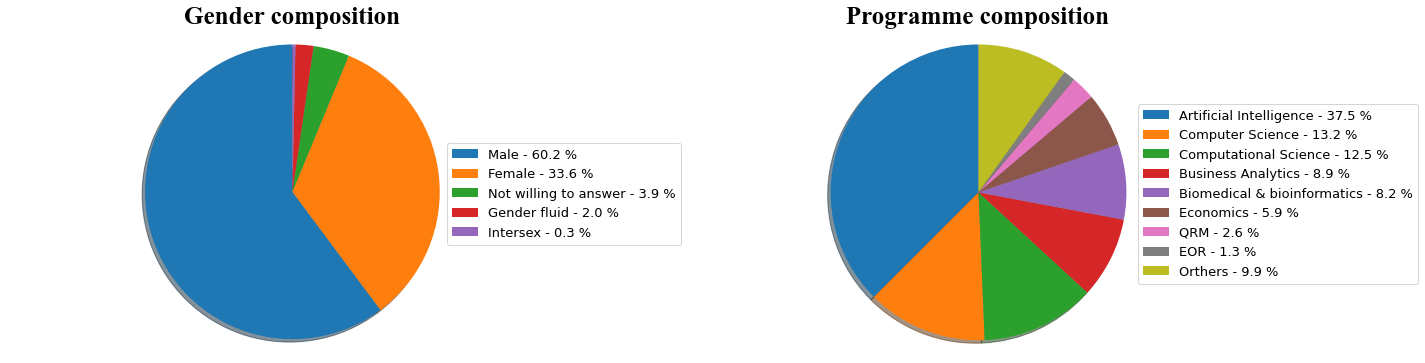

In [61]:
'''
Some basic data structure plot
'''
# set label and size
programme = ['Artificial Intelligence', 'Computer Science', 'Computational Science', \
    'Business Analytics', 'Biomedical & bioinformatics', 'Economics', 'QRM', 'EOR', 'Orthers']
size_programme = np.array([len(ai_index), len(cs_index), len(cls_index), len(ba_index), len(bio_index), len(eco_index), \
    len(qrm_index), len(eor_index), 304-len(indices_ex)])
percent_p = 100*size_programme/size_programme.sum()
label_programme = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(programme, percent_p)]

gender = ['Male', 'Female', 'Not willing to answer', 'Gender fluid', 'Intersex']
size_gender = np.array([len(m_index), len(fm_index), len(na_index), len(gf_index), len(inter_index)])
percent_g = 100*size_gender/size_gender.sum()
label_gender = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(gender, percent_g)]

plt.rcParams['figure.figsize'] = (22.5,6)

fig1, ax1 = plt.subplots(ncols=2, nrows=1)

ax1[0].pie(size_gender, labels=label_gender, shadow=True, startangle=90, labeldistance=None)
ax1[0].axis('equal') 
ax1[0].set_title('Gender composition', fontname="Times New Roman", fontweight="bold", fontsize=25)
ax1[0].legend(loc="center right", bbox_to_anchor=(0.545,0.5), bbox_transform=plt.gcf().transFigure, fontsize=13)

ax1[1].pie(size_programme, labels=label_programme, shadow=True, startangle=90, labeldistance=None)
ax1[1].axis('equal') 
ax1[1].set_title('Programme composition', fontname="Times New Roman", fontweight="bold", fontsize=25)
ax1[1].legend(loc="center right", bbox_to_anchor=(1,0.5), bbox_transform=plt.gcf().transFigure, fontsize=13)
plt.show()

0                     female
1                       male
2                       male
3                       male
4                       male
5                     female
6                       male
7                       male
8                       male
9                     female
10                      male
11                    female
12                      male
13                      male
14                      male
15                      male
16                      male
17                    female
18                      male
19                      male
20                      male
21                    female
22                    female
23                    female
24                      male
25                    female
26                      male
27                    female
28                    female
29                      male
30                    female
31                    female
32                      male
33                    female
34            